In [1]:
'''import tarfile

with tarfile.open('fishRecognition_GT.tar', 'r') as tar:
    tar.extractall('fish')'''


"import tarfile\n\nwith tarfile.open('fishRecognition_GT.tar', 'r') as tar:\n    tar.extractall('fish')"

In [2]:
import numpy as np
np.object = object   
np.int = int  
np.float = float    
np.bool = bool    

In [3]:
import tensorflow as tf 

In [4]:
from tensorflow import keras


In [5]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [6]:
'!pip install split-folders'
import splitfolders
import os
path = "fishaugmentation_fish4knowledge"
print(os.listdir(path))

['fish01', 'fish02', 'fish03', 'fish04', 'fish05', 'fish06', 'fish07', 'fish08', 'fish09', 'fish10', 'fish11', 'fish12', 'fish13', 'fish14', 'fish15', 'fish16', 'fish17', 'fish18', 'fish19', 'fish20', 'fish21', 'fish22', 'fish23']


In [7]:

'''splitfolders.ratio(path,seed=1337,output='fish4knowledge_augmented_output', ratio=(0.8, 0, 0.2))'''


"splitfolders.ratio(path,seed=1337,output='fish4knowledge_augmented_output', ratio=(0.8, 0, 0.2))"

In [8]:
from tensorflow.keras.layers import Dense,Flatten,Dropout,GlobalAveragePooling2D

In [9]:
from tensorflow.keras.applications import ResNet152

In [10]:
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3)
)

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of ee4c566cf9a93f14d82f913c2dc6dd0c so we will re-download the data.
234708992/234698864 [==============================] - 305s 1us/step


In [11]:
conv_base.trainable = False

for layer in conv_base.layers:
    layer.trainable = False

In [12]:
conv_base.summary()

Model: "resnet152"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

In [13]:
from tensorflow.keras.models import Sequential


In [14]:
model = Sequential()
model.add(conv_base)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(23,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, 8, 8, 2048)        58370944  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_2 (Dense)              (None, 23)                5911      
Total params: 60,737,431
Trainable params: 2,366,487
Non-trainable params: 58,370,944
_________________________________________________________________


In [16]:
import tensorflow as tf

batch_size = 16

# Train dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    'fish4knowledge_augmented_output/train',
    image_size=(256, 256),
    batch_size=batch_size,
    shuffle=True,
    label_mode='categorical'
)

# Validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    'fish4knowledge_augmented_output/test',
    image_size=(256, 256),
    batch_size=batch_size,
    shuffle=False,
    label_mode='categorical'
)


Found 49023 files belonging to 23 classes.
Found 12266 files belonging to 23 classes.


In [17]:
epochs = 100

In [18]:
train_dataset = train_dataset.repeat(epochs)

In [19]:
'''for images, labels in train_dataset:
    predictions = model(images)
    print(predictions.shape)  # Check the shape of predictions
    print(labels.shape)       # Check the shape of labels
    break  # Break after one batch for quick inspection'''

'for images, labels in train_dataset:\n    predictions = model(images)\n    print(predictions.shape)  # Check the shape of predictions\n    print(labels.shape)       # Check the shape of labels\n    break  # Break after one batch for quick inspection'

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=25,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [23]:
history = model.fit(train_dataset,steps_per_epoch=32,epochs=epochs,validation_data=validation_dataset,validation_steps=32)

Epoch 1/100
32/32 [==============================] - 45s 735ms/step - loss: 2.6599 - accuracy: 0.3027 - val_loss: 3.0035 - val_accuracy: 0.2207
Epoch 2/100
32/32 [==============================] - 17s 544ms/step - loss: 1.3470 - accuracy: 0.6055 - val_loss: 1.3184 - val_accuracy: 0.6719
Epoch 3/100
32/32 [==============================] - 17s 524ms/step - loss: 0.9433 - accuracy: 0.7129 - val_loss: 0.9619 - val_accuracy: 0.6816
Epoch 4/100
32/32 [==============================] - 15s 466ms/step - loss: 0.6852 - accuracy: 0.8008 - val_loss: 0.6769 - val_accuracy: 0.7812
Epoch 5/100
32/32 [==============================] - 15s 481ms/step - loss: 0.5553 - accuracy: 0.8438 - val_loss: 0.5011 - val_accuracy: 0.8223
Epoch 6/100
32/32 [==============================] - 11s 356ms/step - loss: 0.5743 - accuracy: 0.8418 - val_loss: 0.1760 - val_accuracy: 0.9707
Epoch 7/100
32/32 [==============================] - 11s 355ms/step - loss: 0.4726 - accuracy: 0.8535 - val_loss: 0.2358 - val_accuracy:

In [24]:

'!pip install opencv-python'



'!pip install opencv-python'

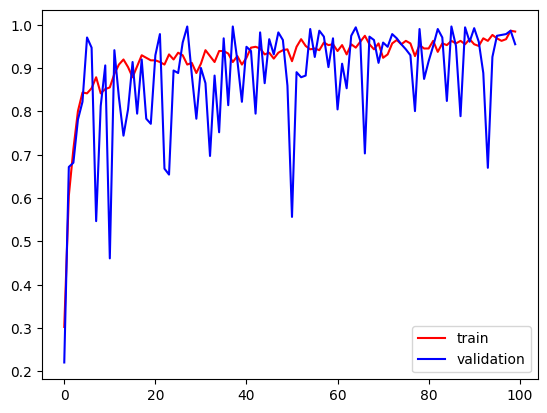

In [25]:
 import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

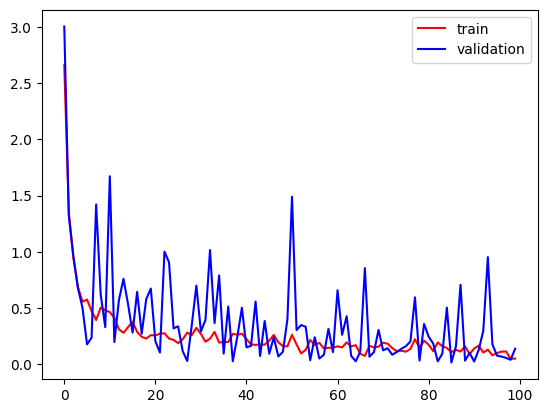

In [26]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [27]:
import cv2

In [28]:
test_img = cv2.imread('fish/fish_image/fish_10/fish_004402417135_11829.png')
import matplotlib.pyplot as plt

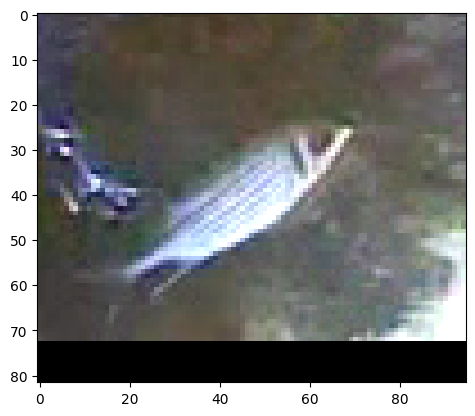

In [29]:
plt.imshow(test_img)

In [30]:
test_img.shape

(82, 95, 3)

In [31]:
test_img = cv2.resize(test_img,(256,256))

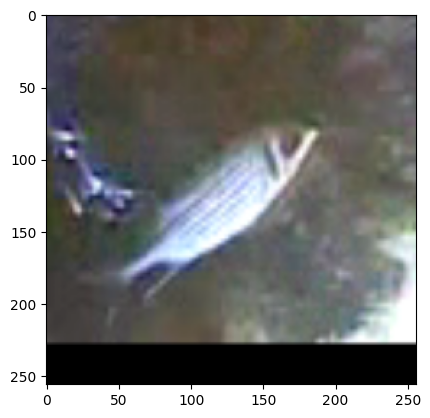

In [32]:
plt.imshow(test_img)

In [33]:
test_input = test_img.reshape((1,256,256,3))

In [34]:
model.predict(test_input)

array([[1.30194740e-05, 1.20149041e-03, 4.65667836e-04, 1.07088342e-01,
        1.03808916e-03, 1.49738241e-03, 2.18484765e-05, 7.94306677e-03,
        2.01000869e-02, 1.76963151e-01, 4.31014866e-01, 1.05300620e-02,
        1.12488575e-04, 2.76707106e-05, 2.83173169e-04, 2.73007751e-02,
        9.52691844e-05, 4.46538943e-05, 7.47992817e-06, 2.14216411e-01,
        3.41676241e-05, 1.02023428e-07, 6.90497927e-07]], dtype=float32)

In [35]:
np.argmax(model.predict(test_input),axis=1)

array([10], dtype=int64)

In [36]:
'''import cv2
import os

def find_max_image_shape(directory):
    max_width, max_height = 0, 0

    # Iterate through all files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):
            # Construct the full file path
            filepath = os.path.join(directory, filename)

            # Read the image
            img = cv2.imread(filepath)

            # Get the shape of the image
            height, width, _ = img.shape

            # Update max width and height if needed
            max_width = max(max_width, width)
            max_height = max(max_height, height)

    return max_width, max_height

# Provide the path to your dataset directory
dataset_directory = "fish project/fish/fish_image/fish_01"

# Call the function to find the maximum image shape
max_width, max_height = find_max_image_shape(dataset_directory)

print("Maximum Image Width:", max_width)
print("Maximum Image Height:", max_height)
'''

'import cv2\nimport os\n\ndef find_max_image_shape(directory):\n    max_width, max_height = 0, 0\n\n    # Iterate through all files in the directory\n    for filename in os.listdir(directory):\n        if filename.endswith((\'.jpg\', \'.jpeg\', \'.png\', \'.gif\')):\n            # Construct the full file path\n            filepath = os.path.join(directory, filename)\n\n            # Read the image\n            img = cv2.imread(filepath)\n\n            # Get the shape of the image\n            height, width, _ = img.shape\n\n            # Update max width and height if needed\n            max_width = max(max_width, width)\n            max_height = max(max_height, height)\n\n    return max_width, max_height\n\n# Provide the path to your dataset directory\ndataset_directory = "fish project/fish/fish_image/fish_01"\n\n# Call the function to find the maximum image shape\nmax_width, max_height = find_max_image_shape(dataset_directory)\n\nprint("Maximum Image Width:", max_width)\nprint("Maxim

In [37]:
# size - padding 
# data augmnetation 
# fine tunning 
# multi layer API 

In [38]:
'''import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Set up the directories
input_dir = 'fish_01_foraugmentation'
output_dir = 'fishaugmentation_fish4knowledge/fish01'

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,# Normalize pixel values to the range [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant'
)

# Load each image in the input directory and generate augmented images
for filename in os.listdir(input_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(input_dir, filename)
        img = image.load_img(img_path)
        x = image.img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generate augmented images and save to the output directory
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='aug', save_format='jpeg'):
            i += 1
            if i >= 75:  # Generate 5 augmented images for each original image
                break

# Display one original and augmented image for verification
original_img = image.load_img(os.path.join(input_dir, os.listdir(input_dir)[0]))
augmented_img = image.load_img(os.path.join(output_dir, os.listdir(output_dir)[0]))

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(augmented_img)
plt.title('Augmented Image')

plt.show()'''

'import os\nfrom tensorflow.keras.preprocessing.image import ImageDataGenerator\nfrom tensorflow.keras.preprocessing import image\nimport matplotlib.pyplot as plt\n\n# Set up the directories\ninput_dir = \'fish_01_foraugmentation\'\noutput_dir = \'fishaugmentation_fish4knowledge/fish01\'\n\n# Create output directory if it doesn\'t exist\nif not os.path.exists(output_dir):\n    os.makedirs(output_dir)\n\n# Create an ImageDataGenerator for data augmentation\ndatagen = ImageDataGenerator(\n    rescale=1./255,# Normalize pixel values to the range [0, 1]\n    rotation_range=20,\n    width_shift_range=0.2,\n    height_shift_range=0.2,\n    shear_range=0.2,\n    zoom_range=0.2,\n    horizontal_flip=True,\n    fill_mode=\'constant\'\n)\n\n# Load each image in the input directory and generate augmented images\nfor filename in os.listdir(input_dir):\n    if filename.endswith(".jpg") or filename.endswith(".png"):\n        img_path = os.path.join(input_dir, filename)\n        img = image.load_img(

In [39]:
'''import os

augmented_folder = 'fishaugmentation_fish4knowledge/fish01'  # Replace with your folder path

image_count = 0
for root, _, files in os.walk(augmented_folder):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):  # Adjust for other image extensions if needed
            image_count += 1

print("Number of images in the augmented folder:", image_count)'''

'import os\n\naugmented_folder = \'fishaugmentation_fish4knowledge/fish01\'  # Replace with your folder path\n\nimage_count = 0\nfor root, _, files in os.walk(augmented_folder):\n    for file in files:\n        if file.endswith((\'.jpg\', \'.jpeg\', \'.png\')):  # Adjust for other image extensions if needed\n            image_count += 1\n\nprint("Number of images in the augmented folder:", image_count)'